In [1]:
#import some neccessary libraried
import numpy as np #linear algebra
import pandas as pd     #data processing
%matplotlib  inline
import matplotlib.pyplot as plt        #Matlab-style potting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn       #ignore annoying warning (FRom sklearn and seaborn)


from scipy import stats
from scipy.stats import norm,skew


pd.set_option('display.float_format', lambda x:'{:.3f}'.format(x))    #limiting float output upto 3 decimal points
from subprocess import check_output
print(check_output(["ls","/home/aloisstar/Downloads/training data model/predi"]).decode("utf8"))    #check the file available in directory

data_description.txt
sample_submission-1.csv
test.csv
train.csv



In [2]:
train = pd.read_csv("/home/aloisstar/Downloads/training data model/predi/train.csv")
test = pd.read_csv("/home/aloisstar/Downloads/training data model/predi/test.csv")

In [3]:
#display the first four row of train dataset
train.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


In [4]:
#display the first five row of test dataset
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
#check the sample size and features
print("The train data size before dropping Id feature: {}".format(train.shape))
print("The test data size before dropping Id feature: {}".format(test.shape))

#save the Id column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the Id column since its unneccessary for prediction process
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)


#check again  data size after dropping the 'Id' variable

print("The train size after dropping Id feature: {}".format(train.shape))
print("The test size after dropping Id feature:{}".format(test.shape))

The train data size before dropping Id feature: (1460, 81)
The test data size before dropping Id feature: (1459, 80)
The train size after dropping Id feature: (1460, 80)
The test size after dropping Id feature:(1459, 79)


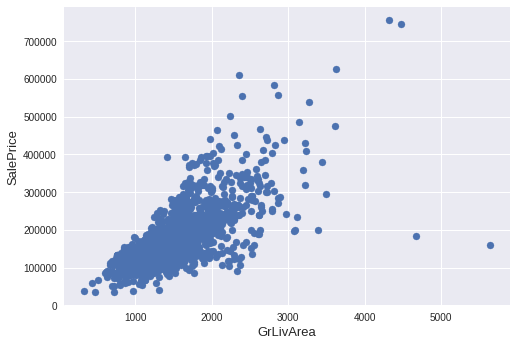

In [6]:
#outliers
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y =train['SalePrice'])
plt.ylabel('SalePrice', fontsize =13)
plt.xlabel('GrLivArea', fontsize = 13)
plt.show()

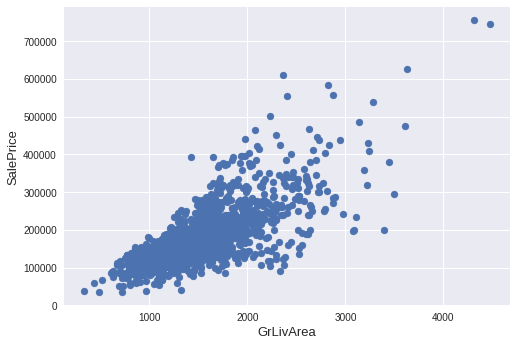

In [7]:
#Deleting the outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
#check the graphic again
fig, ax = plt.subplots()
ax.scatter(x= train['GrLivArea'], y= train['SalePrice'])
plt.ylabel('SalePrice', fontsize =13)
plt.xlabel('GrLivArea', fontsize = 13)
plt.show()


/home/aloisstar/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu= 180932.92 and sigma =79467.79



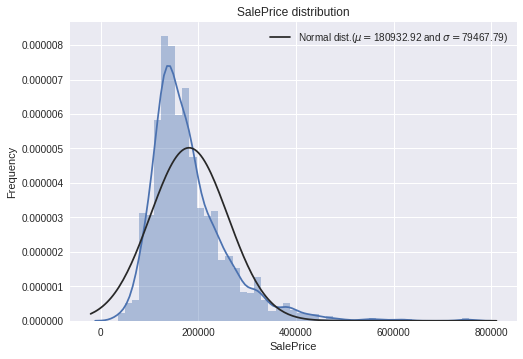

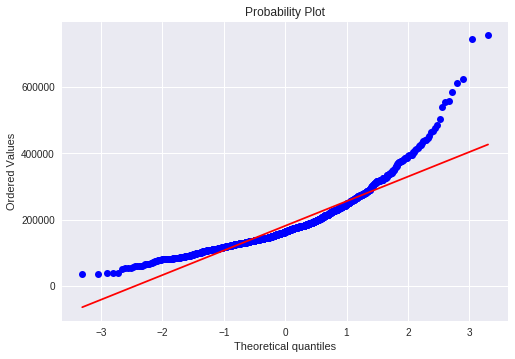

In [8]:
#Target variable analysis
sns.distplot(train['SalePrice'], fit = norm)

#get the fitted parameter used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print('\n mu= {:.2f} and sigma ={:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist.($\mu=${:.2f} and $\sigma =${:.2f})'.format(mu, sigma)],loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


#get also the QQ-Plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot =plt)
plt.show()


/home/aloisstar/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu=12.02 and sigma =0.40



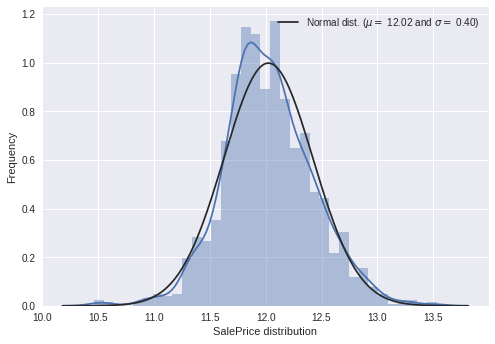

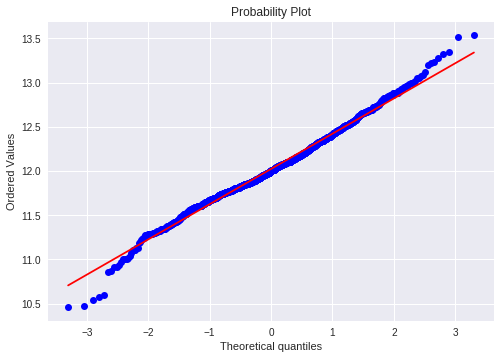

In [9]:
#log transformation of target variable
#we use the numpy function log1p which implies log(1+x) to all elements of colums\
train['SalePrice'] = np.log1p(train['SalePrice'])
#check the new distribution
sns.distplot(train['SalePrice'], fit = norm);
#get the fitted parameter used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print('\n mu={:.2f} and sigma ={:.2f}\n'.format(mu, sigma))

#now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.xlabel('SalePrice distribution')

#Get also QQ-points
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot = plt)
plt.show()

In [10]:
#Feature Engineering
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train , test)).reset_index(drop = True)
all_data.drop(['SalePrice'], axis = 1, inplace = True)
print("all_data size is: {}".format(all_data.shape))

all_data size is: (2917, 79)


In [11]:
#missing data
all_data_na = (all_data.isnull().sum() / len(all_data)) *100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)[:30]
missing_data = pd.DataFrame({'Missing Ratio': all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageQual,5.451
GarageCond,5.451
GarageFinish,5.451
GarageYrBlt,5.451


Text(0.5,1,'Percent missing data by features')

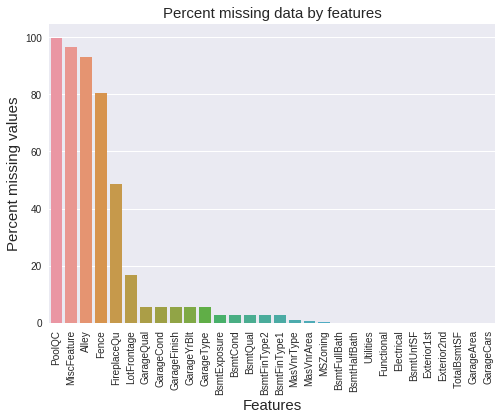

In [12]:
f, ax = plt.subplots()
plt.xticks(rotation = '90')
sns.barplot(x = all_data_na.index, y = all_data_na)
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Percent missing values', fontsize = 15)
plt.title("Percent missing data by features", fontsize = 15)

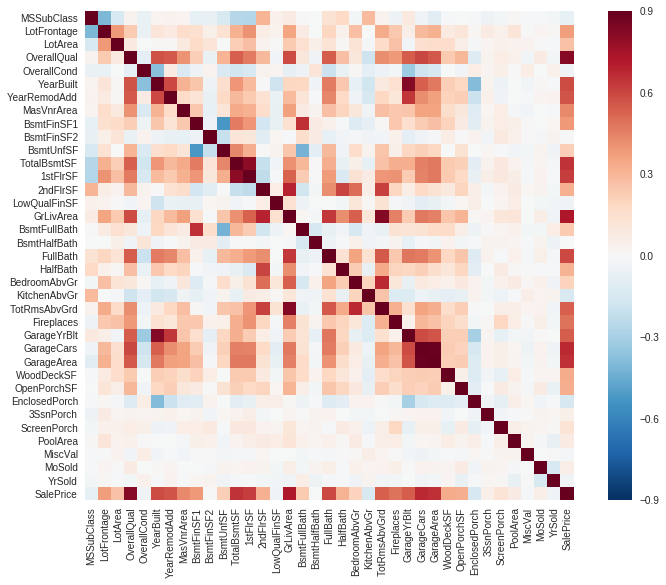

In [13]:
#Data correlation 
#correlaion map to see how feature are correlated with price\
corrmat = train.corr()
plt.subplots(figsize =(12, 9))
sns.heatmap(corrmat, vmax=0.9, square = True)

In [14]:
all_data["PoolQC"] = all_data['PoolQC'].fillna("None")

In [15]:
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')

In [16]:
all_data['Alley'] = all_data['Alley'].fillna('None')

In [17]:
all_data['Fence'] = all_data['Fence'].fillna('None')

In [18]:
all_data['FireplceQu'] = all_data['FireplaceQu'].fillna('None')

In [19]:
#Group by neighbourhood and fill in the missing value by median LotFrontage of all the neighbourhood
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [20]:
#replacing the missing data by none
for col in ('GarageType', 'GarageQual', 'GarageCond','GarageFinish'):
    all_data[col] = all_data[col].fillna('None')


In [21]:
#replacing missing data with 0
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [22]:
#missing value are zero for no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
        all_data[col] = all_data[col].fillna('0')

In [23]:
#for categorical basement feature NaN means there is no basement
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtExposure', 'BsmtCond'):
    all_data[col] = all_data[col].fillna('None')

In [24]:
#MasVnrArea and MasVnrType we can fill 0 for area and None for type
all_data["MasVnrType"] = all_data["MasVnrType"].fillna('None')
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)

In [25]:
#Mszoning "RL"  is by far the most common value. so we can fill RL
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [26]:
all_data = all_data.drop(['Utilities'], axis = 1)

In [27]:
all_data['Functional'] = all_data['Functional'].fillna('Typ')

In [28]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [29]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [30]:
all_data["Exterior1st"] = all_data["Exterior1st"].fillna(all_data['Exterior1st'].mode()[0])
all_data["Exterior2nd"] = all_data["Exterior2nd"].fillna(all_data['Exterior2nd'].mode()[0])


In [31]:
all_data['SaleType']=all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [32]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna('None')

In [33]:
#Check remaining missing value
all_data_na = (all_data.isnull().sum() / len(all_data)) *100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)
missing_data = pd.DataFrame({'Missing Ratio': all_data_na})
missing_data.head(5)

,Missing Ratio
FireplaceQu,48.680


In [34]:
#More feature engoneering
#Transforming numerical value that are categorical
#MSSubClass = The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

#changing OverallCond into categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

#year and month sold are transformed into categorical feature
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold']  = all_data['MoSold'].astype(str)

In [35]:
#Label encoding some categorical variable that may contain information in their ordering set
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'ExterQual', 'ExterCond',
       'HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'Fence',
       'BsmtExposure', 'GarageFinish', 'LandSlope', 'LotShape', 'PavedDrive', 'Street', 'Alley',
       'CentralAir', 'MSSubClass', 'OverallCond','YrSold', 'MoSold')
#process columns apply Label Encoder to categorical feature
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))
    
# Shape
print('Shape of all data: {}'.format(all_data.shape))

Shape of all data: (2917, 79)


In [36]:
#adding one more important feature
#Adding total sqfootage feature
#all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
#all_data['TotalSF'] = (all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF'])

In [37]:
#Skewed feature
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
#check the skew of all numerical feature
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
print("\n skew in numerical feature is: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


 skew in numerical feature is: 



,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
LandSlope,4.973
KitchenAbvGr,4.301
EnclosedPorch,4.002
ScreenPorch,3.945
MasVnrArea,2.622


In [38]:
#Box cox transformation

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical feature to Box Cox Transforma".format(skewness.shape[0]))
from scipy.special import boxcox1p
skewed_features = skewness.index
lam  = 0.15
for feat in skewed_features:
    #all data[feat] +=1
    all_data[feat] = boxcox1p(all_data[feat], lam)
#all_data[skewed_features] = np.log1p(all_data[skewed_feature])

There are 52 skewed numerical feature to Box Cox Transforma


In [39]:
#Getting dummy categoriacal feature
all_data =pd.get_dummies(all_data)
print(all_data.shape)

(2917, 3684)


In [40]:
#gettinng new train and test case
train = all_data[:ntrain]
test = all_data[ntrain:]
test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,...,TotalBsmtSF_3200.0,TotalBsmtSF_3206.0,TotalBsmtSF_5095.0,TotalBsmtSF_0,FireplceQu_Ex,FireplceQu_Fa,FireplceQu_Gd,FireplceQu_None,FireplceQu_Po,FireplceQu_TA
1458,11.819,0.000,0.000,0.730,1.194,1.820,1.541,2.056,1.541,1.820,...,0,0,0,0,0,0,0,1,0,0
1459,12.944,0.000,0.000,0.730,1.541,1.820,1.541,0.000,2.260,1.820,...,0,0,0,0,0,0,0,1,0,0
1460,11.916,11.151,0.000,0.730,1.541,1.820,1.541,1.194,2.260,1.194,...,0,0,0,0,0,0,0,0,0,1
1461,11.910,11.063,0.000,0.730,1.541,1.820,1.541,1.194,2.260,1.820,...,0,0,0,0,0,0,1,0,0,0
1462,12.834,0.000,0.000,0.730,1.194,1.820,1.541,0.000,2.260,1.194,...,0,0,0,0,0,0,0,1,0,0


In [41]:
#Modelling
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [42]:
#define a cross validation strategory
# validation function
n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle = True, random_state = 42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return (rmse)

In [43]:
#Lasso Regression
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state = 1))

In [44]:
#ElasticNet Regression
Enet = make_pipeline(RobustScaler(), ElasticNet(alpha= 0.0005, l1_ratio =9, random_state = 3))

In [45]:
#KernelRidge Regresion
KRR = KernelRidge(alpha = 0.6, kernel = 'polynomial', degree = 2, coef0 = 2.5)

In [46]:
Gboost = GradientBoostingRegressor(n_estimators = 3000, learning_rate = 0.05,
                                  max_depth = 4, max_features = 'sqrt',
                                  min_samples_leaf = 15, min_samples_split = 10,
                                  loss = 'huber', random_state = 5)

# XGBOOST

In [47]:
model_xgb = xgb.XGBRegressor(colsample_bytree = 0.4603, gamma = 0.0468, learning_rate= 0.05, max_depth = 3,
                            min_child_weight = 1.7817, n_estimators = 2200, reg_alpha = 0.4640, reg_lambda = 0.8571,
                            subsample = 0.5213, silent = 1, random_state = 7, nthread = -1)

# LightGBM

In [64]:
model_lgb = lgb.LGBMRegressor(objective = 'regression', num_leaves = 5, learning_rate = 0.05, n_estimators = 720,
                             max_bin = 55, bagging_fraction = 0.8, bagging_freq = 5, feature_fraction = 0.2319,
                             feature_fraction_seed = 9, bagging_seed = 9, min_data_in_leaf = 6,
                             min_sub_hessian_in_leaf = 11)

# BASE Model Score

In [49]:
score = rmsle_cv(lasso)
print('\n Lasso Score: {:.4f}({:.4f})\n'.format(score.mean(), score.std()))


 Lasso Score: 0.1139(0.0075)



In [50]:
score = rmsle_cv(Enet)
print("\n ElasticNet Score: {:.4f} ({:.4f})\n".format(score.mean(),score.std()))


 ElasticNet Score: 0.1267 (0.0074)



In [51]:
score = rmsle_cv(KRR)
print('\n Kernel Ridge Score: {:.4f} ({:.4f})\n'.format(score.mean(), score.std()))


 Kernel Ridge Score: 0.1494 (0.0076)



In [52]:
score = rmsle_cv(Gboost)
print('\n Gradient Boosting Score: {:.4f} ({:.4f})\n'. format(score.mean(), score.std()))


 Gradient Boosting Score: 0.1186 (0.0077)



# Stacking model

# Simplest Stacking Approach:Avearage Base models

In [53]:
class AverageModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
    #we define clone of original model to fit the data in
    def fit(self, X, y):
            self.models_ = [clone(x) for x in self.models]
            #Train cloned base models
            for model in self.models_:
                model.fit(X, y)
            return self
    # Now we do the prediction for the cloned and average them
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions, axis = 1)

# Averaged Base Model  Score

In [54]:
averaged_models = AverageModels(models = (Enet, Gboost, KRR, lasso))

score = rmsle_cv(averaged_models)
print("Averaged Base Model score: {:.4f} ({:.4f})".format(score.mean(), score.std()))


Averaged Base Model score: 0.1169 (0.0074)



# Stacking averaged Model Class 

In [55]:
class StackingAveragedModel(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds = 5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
    
    #We again fit the data on clone of original model
    def fit(self, X , y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits = self.n_folds, shuffle = True, random_state = 156)
        
        #Train clone based model then create out of fold prediction
        # that are needed to clone the meta-data
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
        #now train the cloned meta-model using the out of fold prediction as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
    #Do the prediction of all base model on test data and use the averaged predictions as meta-feature for
    #final prediction which is done by meta model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis = 1) for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

# Stacking Average models score

In [56]:
stacked_averaged_models = StackingAveragedModel(base_models = (Enet, Gboost, KRR),
                                                meta_model = lasso)
score = rmsle_cv(stacked_averaged_models)
print("Stacking Average Model score: {:.4f} {:.4f}".format(score.mean(), score.std()))

Stacking Average Model score: 0.1131 0.0068


# Ensembling StackedRegressor , XGBoost, and LightGBM

In [57]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

Final Prediction and training
StackedRegressor

In [59]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.08614832049241153


XGBOOST

In [60]:
model_xgb.fit(train, y_train)
xgb_train_pred =model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.08099500436021614



# LIGHTGBM

In [67]:
model_lgb.fit(train, y_train)
lgb_train_pred  = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.07090478897547589


In [69]:
'''RMSE on entire train data when averaging'''
print("RMSE ON TRAIN DATA:")
print(rmsle(y_train, stacked_train_pred*0.70+
              xgb_train_pred*0.15+lgb_train_pred*0.15))

RMSE ON TRAIN DATA:
0.08069210410674175


# Ensemble Prediction

In [70]:
ensemble = stacked_pred*0.70 + xgb_pred* 0.15 +lgb_pred*0.15

# Submission

In [71]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv', index =False)